#Импортируем всякое разное

In [1]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import warnings

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

#Подгружаем данные

In [2]:
df = pd.read_csv('/content/Метрика_проект_данные_норм.csv')
df.head()

,Unnamed: 0,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_АКПП,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,...,1_более 6 записей о регистрации,2_Не стоит на учете в ГИБДД,2_Стоит на учете в ГИБДД,3_Был во владении у юр. лица,3_Не был во владении у юр. лица,4_Последний период владения больше 6 лет,4_Последний период владения до 1 года,4_Последний период владения до 6 лет,Ссылка,Название машины
0,0,1350000,122.0,86684.0,1.8,2018,0,0,1,0,...,0,0,1,0,1,0,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/5...,Лада Веста Кросс
1,1,1350000,122.0,77400.0,1.8,2019,0,0,0,1,...,0,0,1,0,1,0,0,1,https://auto.drom.ru/moscow/lada/vesta/2447192...,Лада Веста
2,2,950000,90.0,9200.0,1.6,2023,0,0,1,0,...,0,0,1,0,1,1,0,0,https://auto.drom.ru/moscow/lada/granta/290328...,Лада Гранта
3,4,1165000,122.0,84594.0,1.8,2019,0,0,0,1,...,0,1,0,1,0,0,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/9...,Лада Веста Кросс
4,7,1145000,122.0,58195.0,1.8,2019,0,0,1,0,...,0,1,0,0,1,0,0,1,https://auto.drom.ru/moscow/lada/vesta/6242073...,Лада Веста


In [3]:
#в первом столбике стоят индексы ранней версии таблицы, сейчас индексация новая, поэтому дропнем его
#код нельзя перепрогонять, иначе столбцы будут удаляться и дальше
del df[df.columns[0]]
df.head()

,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_АКПП,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_4WD,...,1_более 6 записей о регистрации,2_Не стоит на учете в ГИБДД,2_Стоит на учете в ГИБДД,3_Был во владении у юр. лица,3_Не был во владении у юр. лица,4_Последний период владения больше 6 лет,4_Последний период владения до 1 года,4_Последний период владения до 6 лет,Ссылка,Название машины
0,1350000,122.0,86684.0,1.8,2018,0,0,1,0,0,...,0,0,1,0,1,0,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/5...,Лада Веста Кросс
1,1350000,122.0,77400.0,1.8,2019,0,0,0,1,0,...,0,0,1,0,1,0,0,1,https://auto.drom.ru/moscow/lada/vesta/2447192...,Лада Веста
2,950000,90.0,9200.0,1.6,2023,0,0,1,0,0,...,0,0,1,0,1,1,0,0,https://auto.drom.ru/moscow/lada/granta/290328...,Лада Гранта
3,1165000,122.0,84594.0,1.8,2019,0,0,0,1,0,...,0,1,0,1,0,0,0,1,https://auto.drom.ru/moscow/lada/vesta_cross/9...,Лада Веста Кросс
4,1145000,122.0,58195.0,1.8,2019,0,0,1,0,0,...,0,1,0,0,1,0,0,1,https://auto.drom.ru/moscow/lada/vesta/6242073...,Лада Веста


In [4]:
#теперь давайте поймем, как выглядят признаки каждого объекта
df.loc[0].tolist()

[1350000,
 122.0,
 86684.0,
 1.8,
 2018,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 'https://auto.drom.ru/moscow/lada/vesta_cross/553824953.html',
 'Лада Веста Кросс']

Заметим, что это несколько количественных переменных (3 штуки и цена), год покупки автомобиля, ссылка на объявление, название автомобиля и много бинарных переменных

#Предварительный анализ данных

In [5]:
#сначала посмотрим, какие масштабы данных для понимания, с чем будем работать
df.describe()

,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_АКПП,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_4WD,...,1_1-2 записей о регистрации,1_3-6 записей о регистрации,1_более 6 записей о регистрации,2_Не стоит на учете в ГИБДД,2_Стоит на учете в ГИБДД,3_Был во владении у юр. лица,3_Не был во владении у юр. лица,4_Последний период владения больше 6 лет,4_Последний период владения до 1 года,4_Последний период владения до 6 лет
count,6.410000e+02,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,...,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,8.269794e+05,97.541342,106336.375975,1.613417,2016.531981,0.037441,0.068643,0.825273,0.068643,0.059282,...,0.708268,0.224649,0.067083,0.283931,0.716069,0.138846,0.861154,0.249610,0.193448,0.556942
std,3.958286e+05,12.755217,79313.194940,0.069424,6.061352,0.189989,0.253043,0.380030,0.253043,0.236337,...,0.454914,0.417677,0.250361,0.451256,0.451256,0.346055,0.346055,0.433125,0.395309,0.497135
min,6.000000e+04,59.000000,69.000000,1.200000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000e+05,87.000000,46749.000000,1.600000,2014.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,8.750000e+05,98.000000,89589.000000,1.600000,2018.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.115000e+06,106.000000,152000.000000,1.600000,2021.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.150000e+06,122.000000,400000.000000,1.800000,2024.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#теперь посмотрим, какие признаки есть у автомобилей
df.columns

Index(['Цена', 'Мощность', 'Пробег', 'Объём двигателя', 'Год',
       'Коробка передач_АКПП', 'Коробка передач_вариатор',
       'Коробка передач_механика', 'Коробка передач_робот', 'Привод_4WD',
       'Привод_задний', 'Привод_передний', 'Тип кузова_джип/suv 3 дв.',
       'Тип кузова_джип/suv 5 дв.', 'Тип кузова_лифтбек', 'Тип кузова_минивэн',
       'Тип кузова_седан', 'Тип кузова_универсал', 'Тип кузова_хэтчбек 3 дв.',
       'Тип кузова_хэтчбек 5 дв.', 'Цвет_бежевый', 'Цвет_белый',
       'Цвет_бордовый', 'Цвет_голубой', 'Цвет_желтый', 'Цвет_зеленый',
       'Цвет_золотистый', 'Цвет_коричневый', 'Цвет_красный', 'Цвет_оранжевый',
       'Цвет_серебристый', 'Цвет_серый', 'Цвет_синий', 'Цвет_фиолетовый',
       'Цвет_черный', '0_Год не совпадает с ПТС',
       '0_Модель не совпадает с ПТС',
       '0_Мощность двигателя не совпадает с ПТС',
       '0_Характеристики совпадают с ПТС', '0_Цвет не совпадает с ПТС',
       '1_1-2 записей о регистрации', '1_3-6 записей о регистрации',
     

In [7]:
#изучим, можно ли сделать название машины используемым признаком или таких названий слишком много
df['Название машины'].nunique()

13

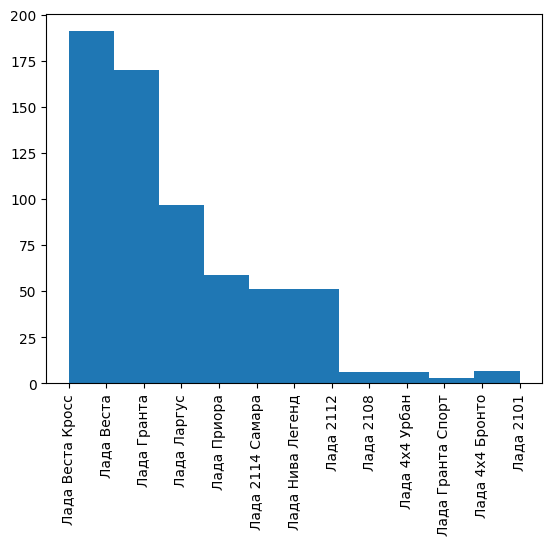

In [8]:
#да, вполне, потому что количество машин всего около 640, а "классов" всего 13, посмотрим на гистограмму распределения
plt.hist(df['Название машины'])
plt.xticks(rotation=90)
plt.show()
#для большей части названий наблюдений достаточно, однако для 5 наименований маловато, позже решим, что с этим делать

In [9]:
#дропнем ссылку как неинформативный признак, а также разделим выборку на признаки и таргет:
df_no_link = df.drop(['Ссылка'], axis=1)
df_link = df['Ссылка']
#разделение выборки на признаки и таргет будет позже, когда преобразуем столбик с названиями машин

In [10]:
#попробуем преобразовать название машин в бинарные признаки через onehotencoder, код частично взят из https://habr.com/ru/articles/666234/
enc = OneHotEncoder(sparse=False)

encoded_column = enc.fit_transform(df_no_link[['Название машины']])
one_hot_df = pd.DataFrame(encoded_column, columns=[f'Название машины_{i}' for i in range(len(df_no_link['Название машины'].unique()))])
df_enc = pd.concat([df_no_link.drop(['Название машины'], axis=1), one_hot_df], axis=1)

df_enc.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Цена,Мощность,Пробег,Объём двигателя,Год,Коробка передач_АКПП,Коробка передач_вариатор,Коробка передач_механика,Коробка передач_робот,Привод_4WD,...,Название машины_3,Название машины_4,Название машины_5,Название машины_6,Название машины_7,Название машины_8,Название машины_9,Название машины_10,Название машины_11,Название машины_12
0,1350000,122.0,86684.0,1.8,2018,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1350000,122.0,77400.0,1.8,2019,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,950000,90.0,9200.0,1.6,2023,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1165000,122.0,84594.0,1.8,2019,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1145000,122.0,58195.0,1.8,2019,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Заметим, что количество признаков увеличилось на 11, это получилось так: убрав название машин из признаков изначально получим 51 признак, прибавим 12 наименований (13-1 из-за того, что можно "отнормировать" к одному названию) и получим 63 (или +11) признаков

In [11]:
#теперь у нас есть огромная таблица с кучей признаков. попробуем прогнать регрессию, чтобы прикинуть на глаз, есть ли мультиколлинеарность или все и так хорошо
df_y_0 = df_enc['Цена']
df_X_0 = df_enc.drop(['Цена'], axis=1)

X_0 = sm.add_constant(df_X_0)
model_0 = sm.OLS(df_y_0, X_0).fit()

print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     138.2
Date:                Tue, 07 May 2024   Prob (F-statistic):          5.97e-290
Time:                        15:44:27   Log-Likelihood:                -8362.2
No. Observations:                 641   AIC:                         1.682e+04
Df Residuals:                     591   BIC:                         1.705e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Несмотря на то, что R^2 оказался очень большим, а все коэффициенты имеют p-value -> 0, мы видим, что практически все коэффициенты оказались отрицательными, более того, в категориальных группах (например, цветов, названий машин, юридических состояний) все коэффициенты тоже зачастую отрицательные, а значит, что, например, любой цвет "удешевляет" машину и никакой не является "предпочтительным". Так как коэффициенты очень большие по модулю и противоречат экономической интуиции, то, скорее всего, в данных присутствует мультиколлинеарность.

In [12]:
#проверим предположение о мультиколлинеарности, посчитав VIF-ы
#ниже мы увидим, что VIF -> inf, а значит будет присутствовать деление на ноль, чтобы избежать предупреждений поставим заглушку
warnings.filterwarnings("ignore")

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_enc.values, i) for i in range(df_enc.shape[1])]
vif["features"] = df_enc.columns

vif.round(1)

,VIF,features
0,12.5,Цена
1,6.4,Мощность
2,2.8,Пробег
3,4.3,Объём двигателя
4,14.1,Год
...,...,...
58,inf,Название машины_8
59,inf,Название машины_9
60,inf,Название машины_10
61,inf,Название машины_11


In [13]:
#заметим, что присутствует VIF -> inf, проверим, сколько их:
vif['VIF'].values

array([12.46169296,  6.37360076,  2.83017722,  4.32819889, 14.13940811,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf])

Практически все VIF -> inf, а значит в данных присутствует огромная мультиколлинеарность. Проблему надо срочно решать.

#Разные регрессии

In [14]:
#регрессия только для цветов
colors = df.columns[20:35]

X_color = sm.add_constant(df_enc[colors])
model_color = sm.OLS(df_enc['Цена'], X_color).fit()

print(model_color.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     7.714
Date:                Tue, 07 May 2024   Prob (F-statistic):           3.69e-15
Time:                        15:44:28   Log-Likelihood:                -9119.7
No. Observations:                 641   AIC:                         1.827e+04
Df Residuals:                     626   BIC:                         1.834e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.414e+05   4.01e+04  

Заметим, что некоторые коэффициенты уже стали положительными, что интуитивно, а p-value перестало везде быть 0, значит оценка цветов уже более содержательная и, что называется, insightful, чем оценка всех параметров

In [15]:
#регрессия только для названий машин
names = df_enc.columns[-13:]

X_name = sm.add_constant(df_enc[names])
model_name = sm.OLS(df_enc['Цена'], X_name).fit()

print(model_name.summary())

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     173.0
Date:                Tue, 07 May 2024   Prob (F-statistic):          5.44e-190
Time:                        15:44:28   Log-Likelihood:                -8702.7
No. Observations:                 641   AIC:                         1.743e+04
Df Residuals:                     628   BIC:                         1.749e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               6.264e+05   1.63

Ситуация тоже стала лучше: коэффициенты тоже бывают положительные, причем большие положительные, а p-value практически везде -> 0, но в данном случае есть логическое объяснение: марка машины напрямую влияет на цену из-за своих характеристик, свойств и репутации.